In [1]:
from pi_map import Mapper

In [2]:
import matplotlib.pyplot as plt

In [3]:
import geopandas as gpd

In [38]:
import pandas as pd

In [4]:
#import fiona

In [5]:
mpr=Mapper()

In [19]:
agg_prediction_spec_df=mpr.pr.build_aggregate_predictions_by_species(rebuild=0)

In [20]:
#agg_prediction_spec_df=agg_prediction_spec_df

In [21]:
yhat=agg_prediction_spec_df.drop('y_train',level='estimator').loc[:,agg_prediction_spec_df.columns!='y']

In [22]:
y=agg_prediction_spec_df.xs('y_train',level='estimator').loc[:,['y']]

In [23]:
y_a,yhat_a= y.align(yhat,axis=0)

In [24]:
diff=-1*yhat_a.sub(y_a['y'],axis=0)


In [32]:
mean_prediction_err=diff.mean(axis=1).mean(level='HUC12')

In [67]:
err_df=mean_prediction_err.rename('err').reset_index().rename(columns={'HUC12':'huc12'})

In [68]:
err_df

,huc12,err
0,010802010501,0.000000
1,010802010503,0.033333
2,010802010602,-0.200000
3,010802010702,-0.100000
4,010802040402,-0.029412
...,...,...
11827,170402170604,-0.750000
11828,170402180402,-1.000000
11829,170402180403,-1.000000
11830,020801110204,0.100000


In [48]:
mpr.h12_boundary.dtypes

tnmid                         object
metasourceid                  object
sourcedatadesc                object
sourceoriginator              object
sourcefeatureid               object
loaddate                      object
noncontributingareaacres     float64
noncontributingareasqkm      float64
areasqkm                     float64
areaacres                    float64
referencegnis_ids             object
name                          object
states                        object
huc12                         object
hutype                        object
humod                         object
tohuc                         object
globalid                      object
shape_Length                 float64
shape_Area                   float64
geometry                    geometry
dtype: object

In [70]:
err_geo_df=mpr.h12_boundary.merge(err_df,on='huc12')

<AxesSubplot:>

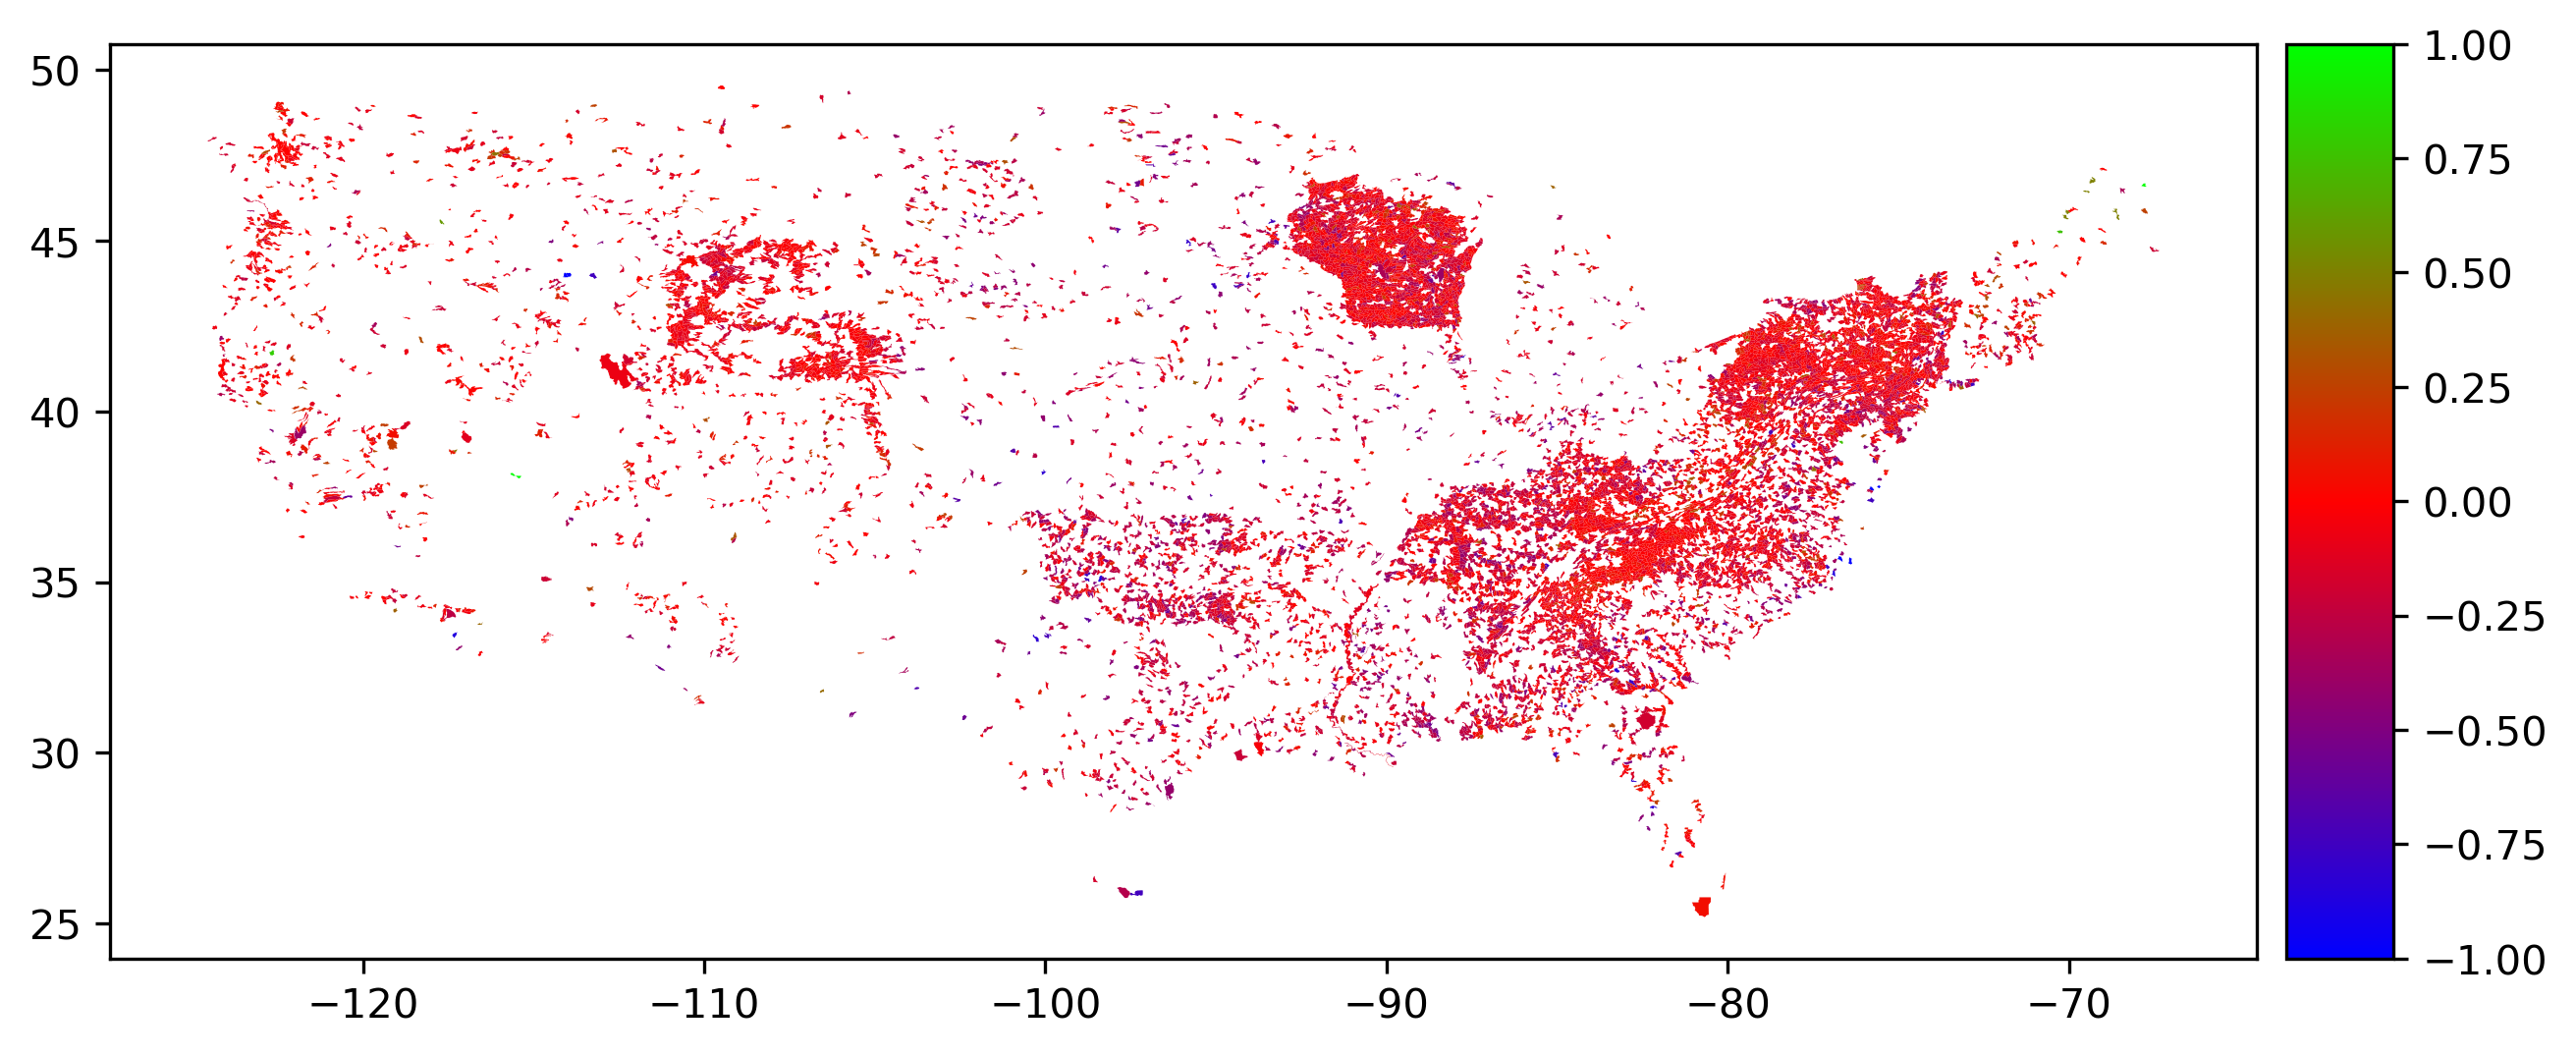

In [88]:

from mpl_toolkits.axes_grid1 import make_axes_locatable
fig=plt.figure(dpi=300,figsize=[10,8])
ax=fig.add_subplot(1,1,1)


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

err_geo_df.plot(column='err',ax=ax,cax=cax,legend=True,cmap='brg')#,legend_kwds={'orientation':'vertical'})

In [89]:
fig.savefig('error_map3.png',facecolor='w',orientation='landscape')

In [6]:
mpr.draw_huc12_truefalse()

KeyError: 'huc12'

In [ ]:
mpr.getHuc12Boundary()

In [ ]:
#fiona.listlayers(mpr.boundary_data_path)

In [ ]:
#g_df=gpd.read_file(mpr.boundary_data_path,layer='WBDHU12')

In [ ]:
fig=plt.figure(dpi=300,figsize=[10,14])
ax=fig.add_subplot(1,1,1)
mpr.h12_boundary.plot(ax=ax)

In [15]:
mpr.h12_boundary.loc[:,'huc12']

0         070200090402
1         070200030503
2         070200030602
3         070200030701
4         070200030702
              ...     
102903    190601020508
102904    190601020502
102905    190601020601
102906    190601020602
102907    190601020603
Name: huc12, Length: 102908, dtype: object